<a href="https://colab.research.google.com/github/Khaled-Mohammed-Abdelgaber/advanced-ppg-clustering-peak-to-peak-aug-data/blob/main/conv_autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import numpy as np
from tensorflow.keras.layers import LeakyReLU

from keras.layers import Dense
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from keras.models import Model
import seaborn as sns
import tensorflow as tf
import keras

In [ ]:

#for Kmeans
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [ ]:
ppg_one_beat = pd.read_csv("/content/gdrive/MyDrive/data/peak2peak_aug_2022/Part_1/p2p_beats/part_1_PPG_beats_P2P_Aug_2022.csv",
                           names = np.arange(120))
ppg_10_beats = pd.read_csv("/content/gdrive/MyDrive/data/peak2peak_aug_2022/Part_1/10_beat_signals/part_1_PPG_signals_10_beats_Aug_2022.csv",
                           names = np.arange(1024))
id = pd.read_csv("/content/gdrive/MyDrive/data/peak2peak_aug_2022/Part_1/p2p_beats/part_1_Subj_ID_beats_P2P_Aug_2022.csv",names = ["ID"])
sys_df = pd.read_csv("/content/gdrive/MyDrive/data/peak2peak_aug_2022/Part_1/p2p_beats/part_1_SYS_BP_beats_P2P_Aug_2022.csv",
                     names = ["sys"])
dia_df = pd.read_csv("/content/gdrive/MyDrive/data/peak2peak_aug_2022/Part_1/p2p_beats/part_1_Dia_BP_beats_P2P_Aug_2022.csv",
                     names = ["dia"])

In [ ]:
df_info = pd.DataFrame()
 
df_info["dia"]  = dia_df
df_info["sys"]  = sys_df
df_info["ID"] = id

In [ ]:
X = ppg_one_beat.values

In [ ]:
X_train = X[:115905,:]
X_test = X[115905:,:]

In [ ]:
idx1 = np.random.permutation(len(X_train))
X_train = X_train[idx1]
idx2 = np.random.permutation(len(X_test))
X_test = X_test[idx2]


In [ ]:
X = X.reshape((X.shape[0], X.shape[1], 1))
X.shape

(154540, 120, 1)

In [ ]:
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
X_train.shape

(115905, 120, 1)

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))
X_train.shape

(115905, 120, 1)

In [ ]:
input_shape = (120, 1)

In [ ]:
from tensorflow.keras.layers import Conv1D , MaxPooling1D, AveragePooling1D, Flatten,Reshape,UpSampling1D,Input

In [ ]:
#MAIN MODEL
input_layer = keras.layers.Input(input_shape)
x = Conv1D(8,3, activation='leaky_relu', padding='same',dilation_rate=2)(input_layer)
x1 = MaxPooling1D(2)(x)
x2 = Conv1D(4,3, activation='leaky_relu', padding='same',dilation_rate=2)(x1)
x3 = MaxPooling1D(2)(x2)
x4 = AveragePooling1D()(x3)
flat = Flatten()(x4)
encoded = Dense(6)(flat)
d1 = Dense(60)(encoded)
d2 = Reshape((15,4))(d1)
d3 = Conv1D(4,1,strides=1, activation='leaky_relu', padding='same')(d2)
d4 = UpSampling1D(2)(d3)
d5 = Conv1D(8,1,strides=1, activation='leaky_relu', padding='same')(d4)
d6 = UpSampling1D(2)(d5)
d7 = UpSampling1D(2)(d6)
decoded = Conv1D(1,1,strides=1, activation='sigmoid', padding='same')(d7)
model= Model(input_layer, decoded)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 120, 1)]          0         
                                                                 
 conv1d (Conv1D)             (None, 120, 8)            32        
                                                                 
 max_pooling1d (MaxPooling1D  (None, 60, 8)            0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 60, 4)             100       
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 30, 4)            0         
 1D)                                                             
                                                                 
 average_pooling1d (AverageP  (None, 15, 4)            0     

In [ ]:
model.compile(optimizer='adam', loss='mse')

In [ ]:
history = model.fit(X_train, X_train, epochs=20, batch_size=16, verbose=2, validation_data=(X_test,X_test))

Epoch 1/20
7245/7245 - 25s - loss: 0.0054 - val_loss: 0.0035 - 25s/epoch - 3ms/step
Epoch 2/20
7245/7245 - 24s - loss: 0.0032 - val_loss: 0.0034 - 24s/epoch - 3ms/step
Epoch 3/20
7245/7245 - 22s - loss: 0.0031 - val_loss: 0.0033 - 22s/epoch - 3ms/step
Epoch 4/20
7245/7245 - 24s - loss: 0.0031 - val_loss: 0.0033 - 24s/epoch - 3ms/step
Epoch 5/20
7245/7245 - 22s - loss: 0.0031 - val_loss: 0.0033 - 22s/epoch - 3ms/step
Epoch 6/20
7245/7245 - 24s - loss: 0.0031 - val_loss: 0.0033 - 24s/epoch - 3ms/step
Epoch 7/20
7245/7245 - 22s - loss: 0.0031 - val_loss: 0.0033 - 22s/epoch - 3ms/step
Epoch 8/20
7245/7245 - 22s - loss: 0.0031 - val_loss: 0.0033 - 22s/epoch - 3ms/step
Epoch 9/20
7245/7245 - 23s - loss: 0.0031 - val_loss: 0.0033 - 23s/epoch - 3ms/step
Epoch 10/20
7245/7245 - 27s - loss: 0.0031 - val_loss: 0.0033 - 27s/epoch - 4ms/step
Epoch 11/20
7245/7245 - 28s - loss: 0.0031 - val_loss: 0.0032 - 28s/epoch - 4ms/step
Epoch 12/20
7245/7245 - 26s - loss: 0.0031 - val_loss: 0.0032 - 26s/epoch 

In [ ]:
# define an encoder model (without the decoder)
encoder = Model(inputs=input_layer, outputs=encoded)
decoder = Model(inputs=encoded, outputs=decoded)
autoencoder = Model(inputs=input_layer, outputs=decoded)
# save the encoder to file
encoder.save('/content/gdrive/MyDrive/data/encoder_ConV.h5')

In [ ]:
X_encode = encoder.predict(X)

X_auto_encoder = autoencoder.predict(X)

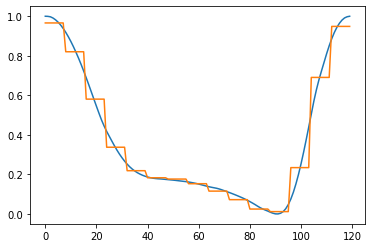

In [ ]:
#plt.plot(X_encode[0])
plt.plot(X[15500])
plt.plot(X_auto_encoder[15500])

In [ ]:
X_encode.shape

(154540, 6)

12
14
16


Text(0.5, 1.0, '‘Silhouette analysis For Optimal k’')

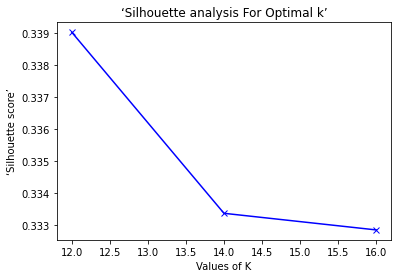

In [ ]:
# check best K for clustering 
range_n_clusters = [ 12,14,16]#,14,16]
silhouette_avg = []
for num_clusters in range_n_clusters:
  print(num_clusters)
  # initialise kmeans
  kmeans = KMeans(n_clusters=num_clusters)
  kmeans.fit(X_encode)
  cluster_labels = kmeans.labels_
  
  # silhouette score
  silhouette_avg.append(silhouette_score(X_encode, cluster_labels))
plt.plot(range_n_clusters,silhouette_avg,"bx-")
plt.xlabel('Values of K') 
plt.ylabel("‘Silhouette score’") 
plt.title("‘Silhouette analysis For Optimal k’")

In [ ]:
# initialise kmeans
kmeans = KMeans(n_clusters=13)
kmeans.fit(X_encode)
conv_encoder_cluster_labels = kmeans.labels_

In [ ]:
df_info ["conv_encoder_cluster_labels"] = conv_encoder_cluster_labels

In [ ]:
df_info

,dia,sys,ID,conv_encoder_cluster_labels
0,66.526,123.040,1,6
1,65.598,120.990,1,6
2,66.135,119.570,1,6
3,66.135,122.350,1,6
4,67.503,122.750,1,11
...,...,...,...,...
154535,58.357,88.240,3000,2
154536,58.983,88.240,3000,2
154537,58.670,86.988,3000,2
154538,58.044,88.866,3000,4


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warnin

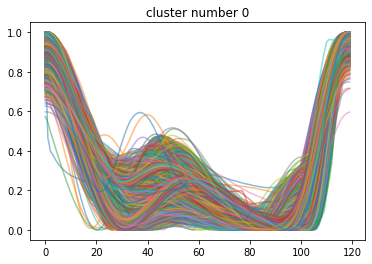

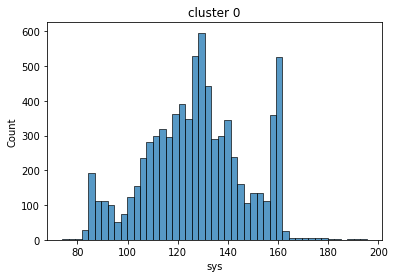

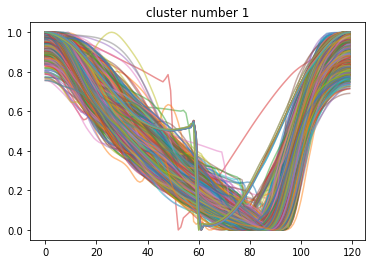

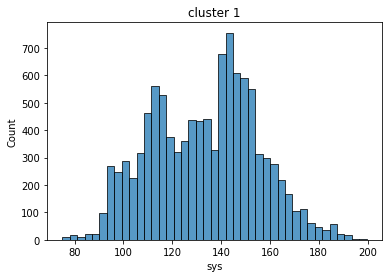

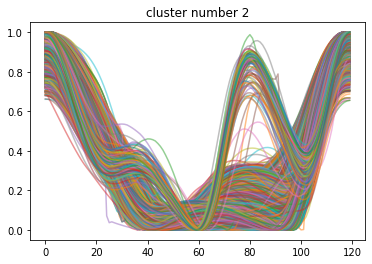

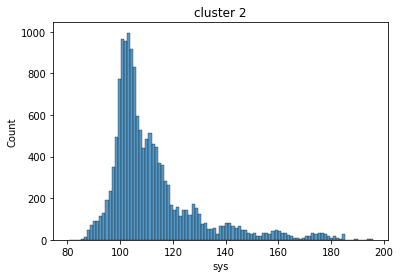

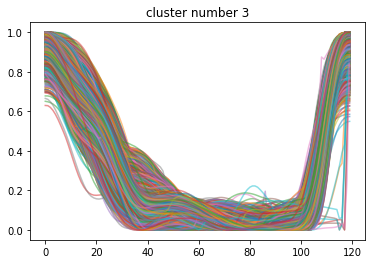

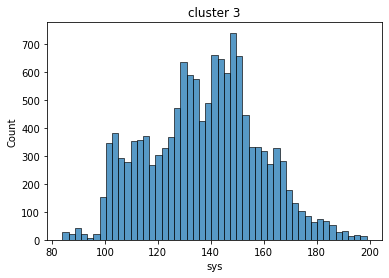

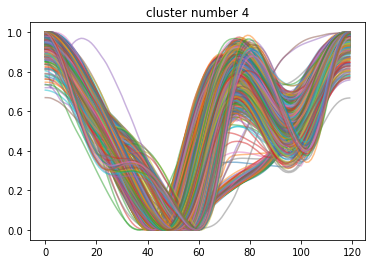

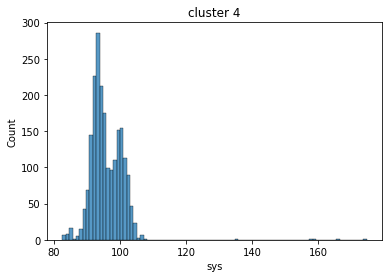

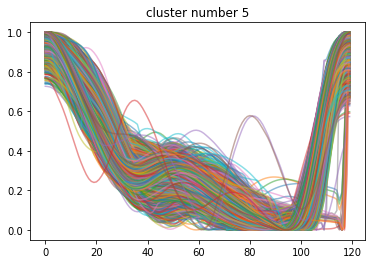

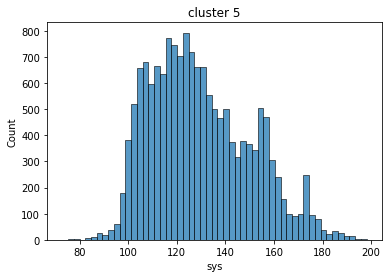

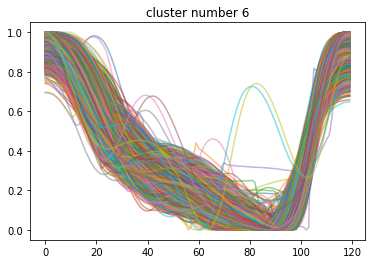

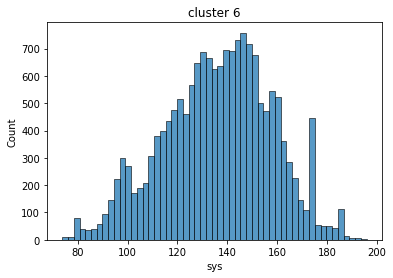

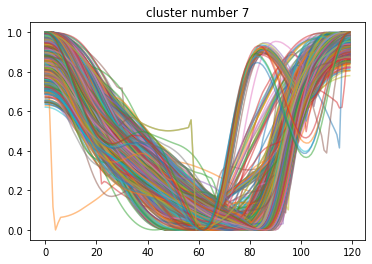

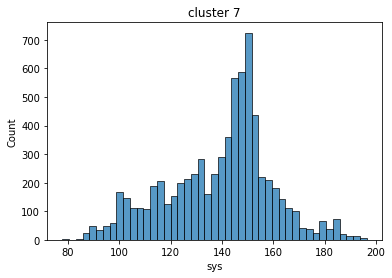

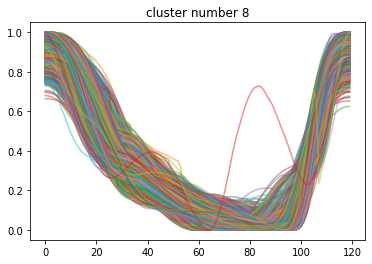

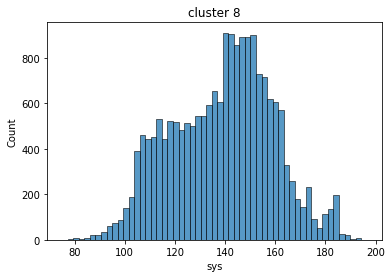

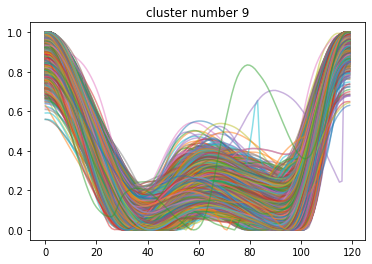

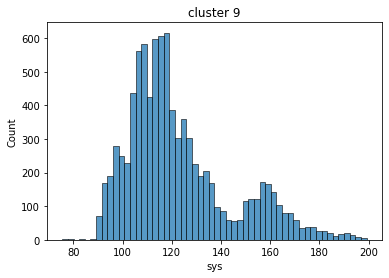

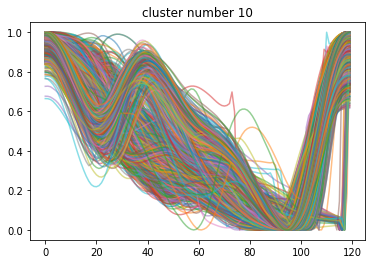

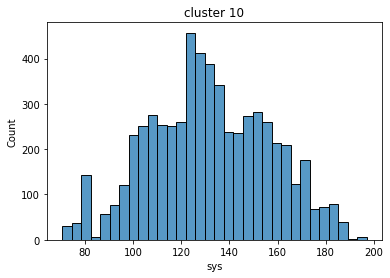

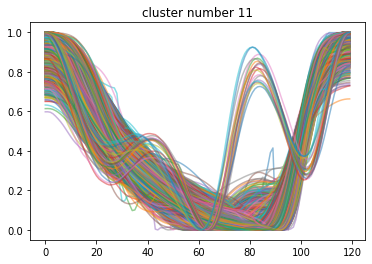

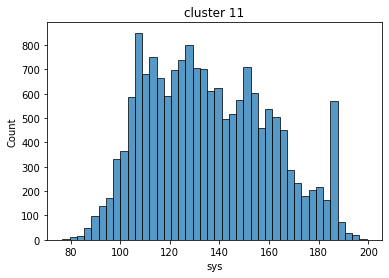

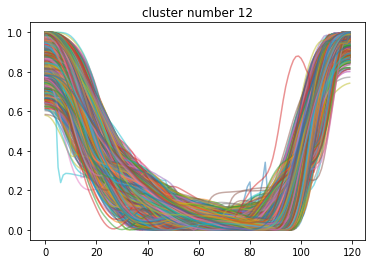

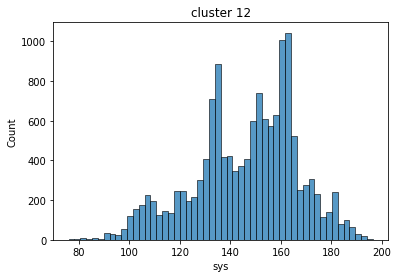

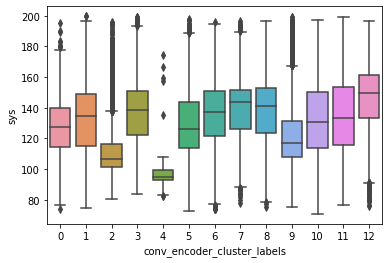

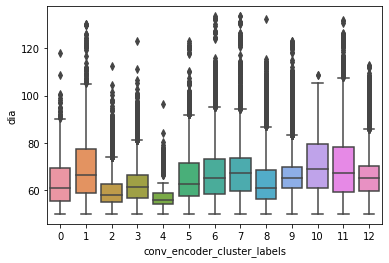

In [ ]:
for i in range(13):
  plt.figure();
  plt.title("cluster number "+str(i));
  plt.plot(ppg_one_beat[conv_encoder_cluster_labels == i].values.T,alpha = 0.5);
  
  plt.figure();
  plt.title("cluster "+str(i))
  sns.histplot(x = df_info["sys"][df_info ["conv_encoder_cluster_labels"] == i]  )

plt.figure();
sns.boxplot(x = "conv_encoder_cluster_labels",y="sys",data = df_info)
plt.figure();
sns.boxplot(x = "conv_encoder_cluster_labels",y="dia",data = df_info)